In [34]:
import pandas as pd
import numpy as np
import csv
from nltk import word_tokenize
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

In [12]:
data = pd.read_csv('dataset.csv')
X = data.iloc[:,4].values.astype('U')
for i in range(5545):
    X[i] = str.lower(X[i])

In [16]:
y_output = []
for item in data['Genre'] :
    if item == 'rock' : 
        y_output.append(0)
    elif item == 'r&b' :
        y_output.append(1)
    elif item == 'blues' :
        y_output.append(2)
    elif item == 'country' :
        y_output.append(3)
    elif item == 'edm' :
        y_output.append(4) 
    elif item == 'rap' :
        y_output.append(5)
    elif item == 'pop' :
        y_output.append(6)

In [40]:
def tf_idf_cross_val(k , min_df , max_df , X_input , y_output) :
    vectorizer = TfidfVectorizer(max_df=max_df , min_df=min_df)
    X_fit = vectorizer.fit_transform(X_input)
    model = KNeighborsClassifier(n_neighbors= k , weights='uniform')
    kf = sk.model_selection.KFold(n_splits=10)
    accuracy = []
    for train , test in kf.split(X_fit) : 
        model.fit(X_fit[train] , y_output[train])
        ypred = model.predict(X_fit[test])
        accuracy.append(sk.metrics.accuracy_score(y_output[test] , ypred))

    return np.array(accuracy).mean() , np.array(accuracy).std()

In [45]:
vectorizer = TfidfVectorizer(max_df=max_df , min_df=min_df)
X_fit = vectorizer.fit_transform(X)

In [47]:
X_fit.toarray()

array([[0.        , 0.16562587, 0.13112279, ..., 0.        , 0.21555418,
        0.39219823],
       [0.        , 0.        , 0.        , ..., 0.        , 0.29663222,
        0.42056006],
       [0.11520707, 0.16942224, 0.09580593, ..., 0.09560569, 0.01889957,
        0.        ],
       ...,
       [0.        , 0.03447337, 0.06822975, ..., 0.02269571, 0.52492575,
        0.0349852 ],
       [0.04886426, 0.        , 0.08533436, ..., 0.        , 0.27655609,
        0.        ],
       [0.        , 0.16022605, 0.06342393, ..., 0.        , 0.25023188,
        0.16260495]])

In [42]:
accuracy_all = []
std_error_all = []
min_range = np.linspace(0,0.3,6)
max_range = np.linspace(0,1,11)
for max_df in max_range :
    accuracy = []
    std_error = []
    for min_df in min_range :
        try :
            output = tf_ifd_cross_val(5, min_df , max_df , X , y_output)
            accuracy.append(output[0])
            std_error.append(output[1])
        except : 
            accuracy.append(0)
            std_error.append(0)
    accuracy_all.append([accuracy , max_df])
    std_error_all.append([std_error , max_df])

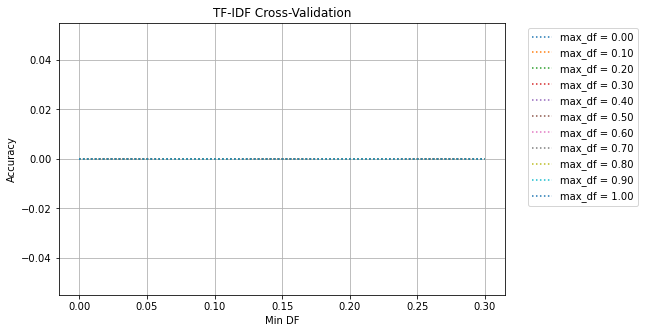

In [43]:
fig , ax = plt.subplots(figsize = (8,5))
for item1,item2 in zip(accuracy_all, std_error_all) : 
    plt.plot(min_range , item1[0] , label = 'max_df = %1.2f' % item1[1] , linestyle = 'dotted')
    for i in range(len(min_range)) : 
        ax.errorbar(min_range[i] , item1[0][i] , yerr=item2[0][i] , ecolor='r')
        
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel('Accuracy')
plt.xlabel('Min DF')
plt.title('TF-IDF Cross-Validation')
plt.grid()

In [44]:
tf_ifd_cross_val(5, min_df , max_df , X , y_output)

NameError: name 'sk' is not defined